# 🏦 Exploratory Data Analysis on the Credit Risk Analysis Dataset

Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=ImportWarning)


Loading the dataset

In [2]:
df = pd.read_csv('/Users/elbethelzewdie/Downloads/credit_risk_model/credit-risk-model/data/raw/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

The dataset comprises 95,662 rows and 16 columns. It is complete, containing no missing values. The feature set includes 11 object (categorical) types and 5 numeric types.

In [3]:
# Display the first few rows of the dataframe
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Summary Statistics

In [4]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


- The CountryCode column has no variation, as every row has a value of 256. This indicates that the dataset only contains transactions from Uganda (country code 256), and therefore this feature does not provide predictive information.

- The Amount column represents the amount the customer attempted to pay. It contains negative values, which may correspond to reversals, refunds, or errors. The column also exhibits extreme outliers, with values reaching almost 10 million, and its distribution is heavily skewed.

- The Value column represents the amount actually charged and is very similar to the Amount column. Like Amount, it is heavily skewed and contains very large values, requiring careful handling during analysis.

- The PricingStrategy column likely indicates the method used to price the transaction. Although it is encoded as numbers, it is a categorical feature rather than a continuous numeric variable. Its values range from 0 to 4, representing five distinct pricing strategies.

- The FraudResult column is the target variable, indicating whether a transaction was fraudulent. Only approximately 0.2% of transactions are labeled as fraud, making this an extremely imbalanced dataset.

In [5]:
numeric_cols = df.select_dtypes(include='number')

# Compute skewness
print("Skewness:\n", numeric_cols.skew())

# Compute kurtosis
print("Kurtosis:\n", numeric_cols.kurtosis())

Skewness:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64
Kurtosis:
 CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64


Skewness Discussion

- CountryCode (0.0): No skewness, as expected, because this column has a single constant value.

- Amount (51.10) & Value (51.29): Extremely high positive skew. Most transactions are small amounts, but there are a few very large transactions causing a long right tail. This indicates the presence of extreme outliers.

- PricingStrategy (1.66): Moderate positive skew, suggesting some pricing strategies are more common than others, but the distribution is not extremely unbalanced.

- FraudResult (22.20): Very high positive skew due to extreme imbalance — almost all transactions are non-fraudulent, with very few fraud cases.

Amount and Value may require log transformation or outlier handling for modeling.

Kurtosis Discussion

- CountryCode (0.0): No kurtosis,a constant column.

- Amount (3363.13) & Value (3378.07): Extremely high kurtosis, confirming heavy tails and extreme outliers. Most values are concentrated around low amounts with very few extremely large transactions.

- PricingStrategy (2.09): Slightly leptokurtic (peaked), indicating some pricing strategies occur more frequently.

- FraudResult (490.69): Extremely high kurtosis, highlighting the rare occurrence of fraud relative to non-fraud transactions.

High kurtosis in Amount and Value reinforces the need for robust modeling techniques that can handle outliers.

### Distribution of Numerical Features


Numeric Columns: ['Amount', 'Value']


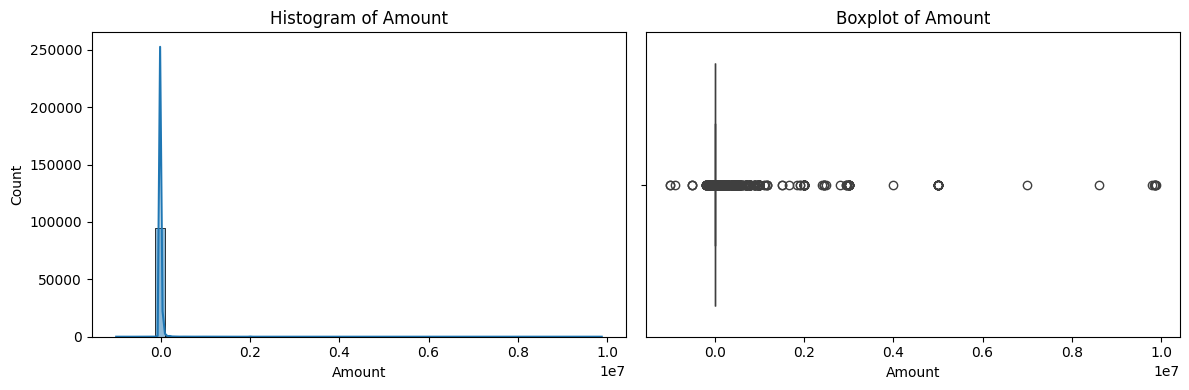

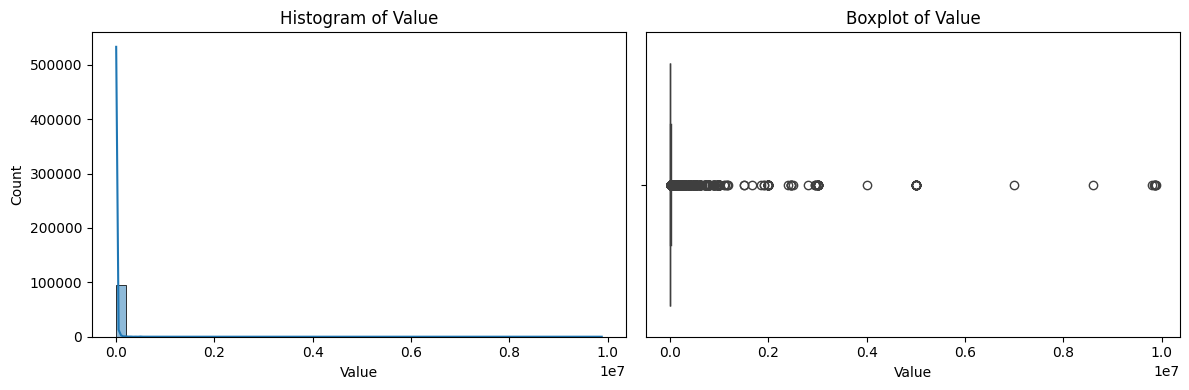

In [6]:
numeric_cols = ['Amount', 'Value']

print("Numeric Columns:", numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

- Both Value and Amount are extremely right-skewed, with most transactions concentrated near zero and a small number of very large transactions creating a long tail.

- The boxplots show many high-value outliers, indicating heavy-tailed behavior typical in financial data and suggesting that raw values may distort model training.

- These distributions highlight the need for preprocessing techniques such as log transformation, scaling, or outlier capping to stabilize the data and improve model performance.

### Distribution of Categorical Features

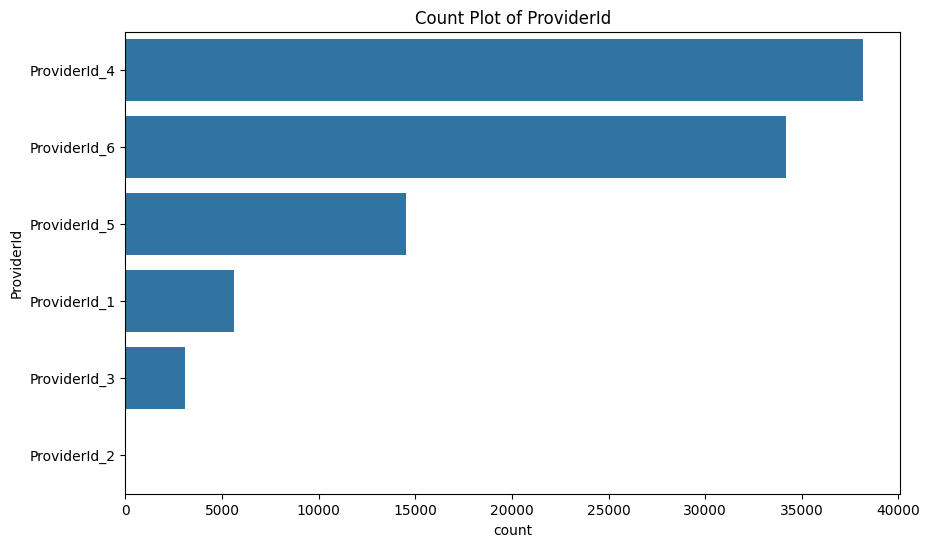

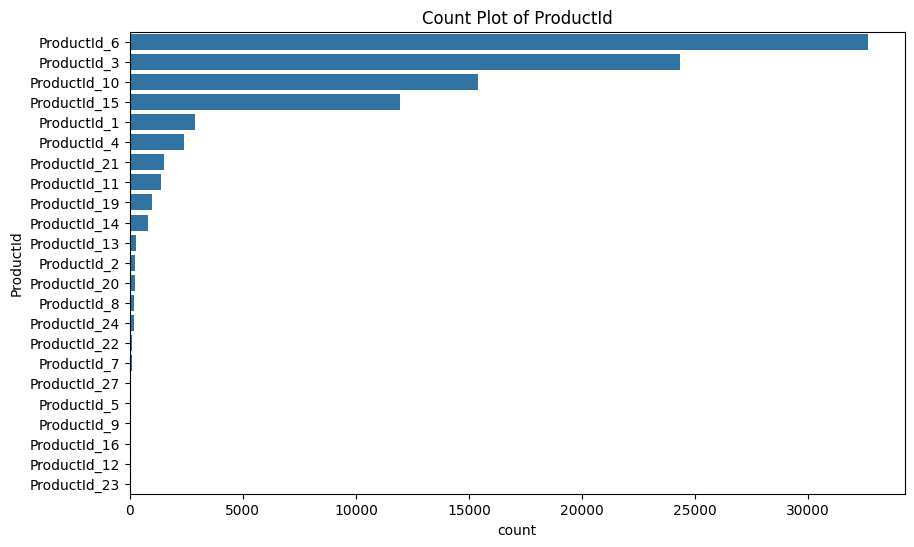

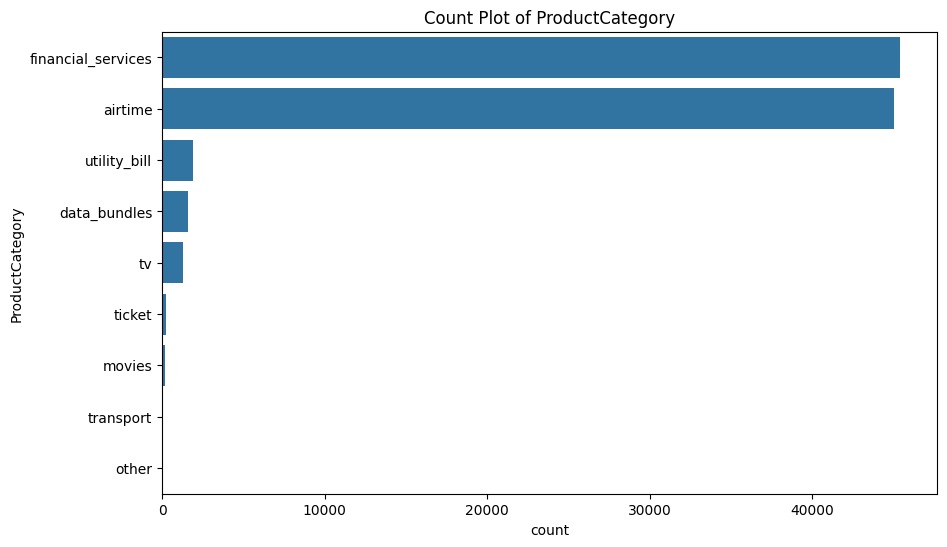

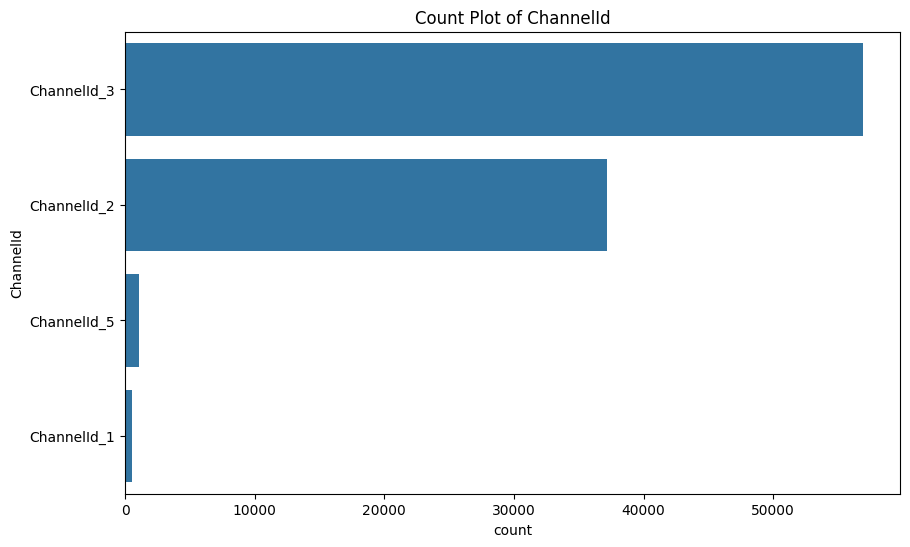

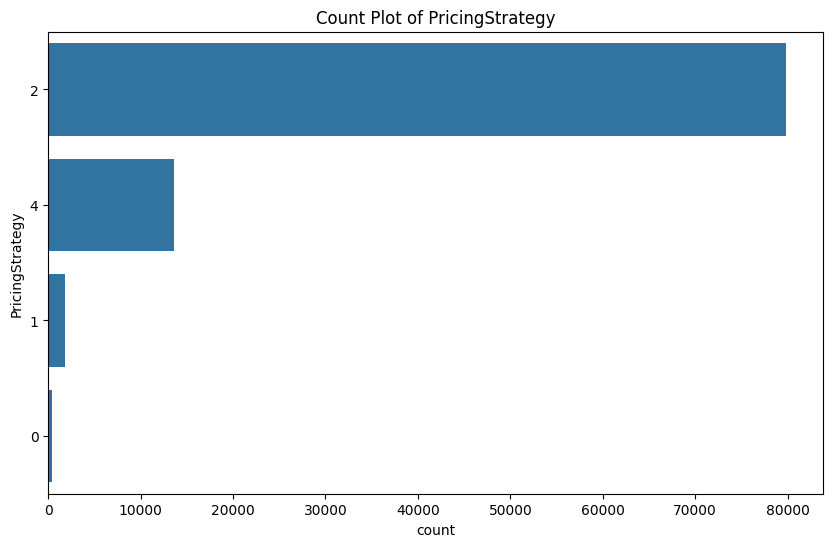

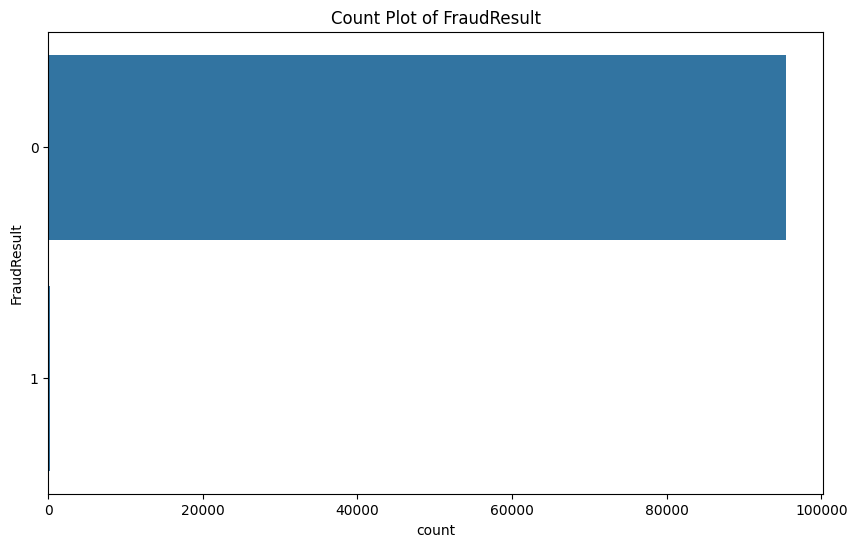

In [7]:
cat_cols = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']
for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()

### Correlation Analysis

                   Amount     Value  FraudResult  PricingStrategy
Amount           1.000000  0.989692     0.557370        -0.061931
Value            0.989692  1.000000     0.566739        -0.017020
FraudResult      0.557370  0.566739     1.000000        -0.033821
PricingStrategy -0.061931 -0.017020    -0.033821         1.000000


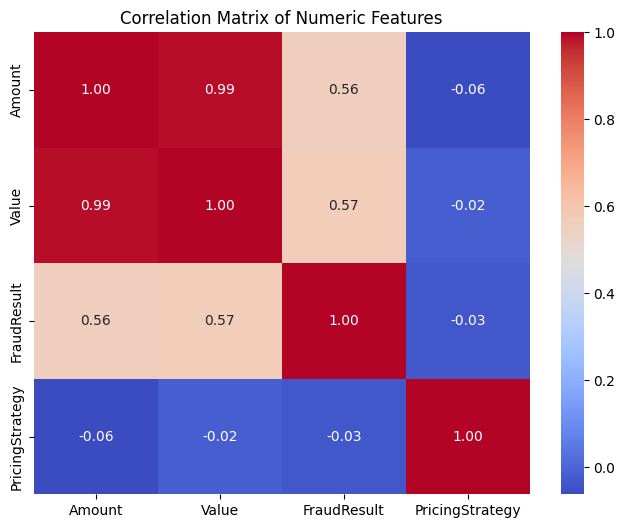

In [8]:
# Compute correlation matrix
numeric_cols = ['Amount', 'Value', 'FraudResult', 'PricingStrategy']

corr_matrix = df[numeric_cols].corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

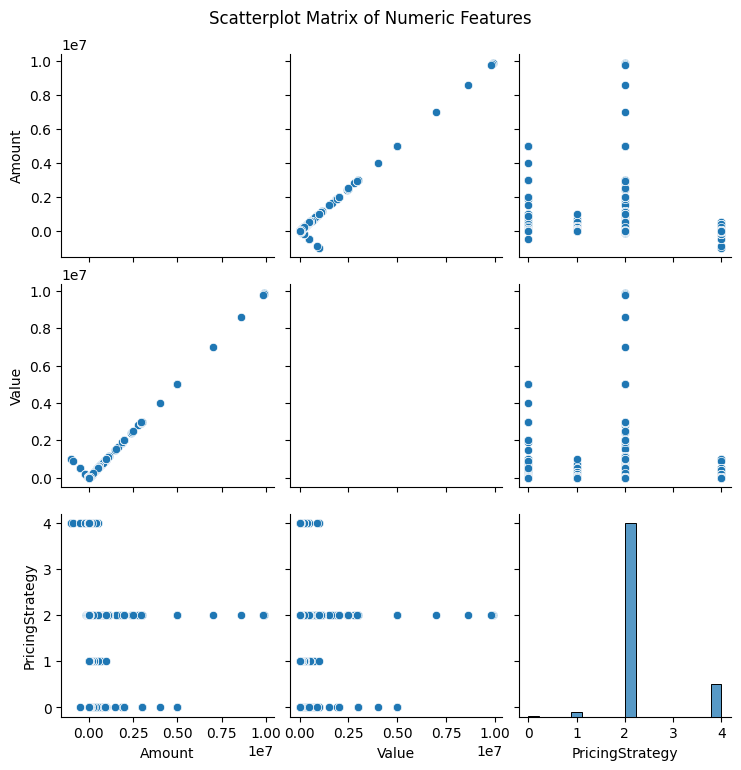

In [9]:
numeric_cols = ['Amount', 'Value', 'PricingStrategy']
sns.pairplot(df[numeric_cols])
plt.suptitle('Scatterplot Matrix of Numeric Features', y=1.02)
plt.show()

## Insight from the EDA analysis

1. Extreme Skew and Heavy Tails in Transaction Values
Amount and Value show extremely high positive skewness (≈51) and kurtosis (≈3,300), indicating:

- Most transactions are small, but a few are very large.

- Presence of extreme outliers (up to 9.88M) and negative values (down to -1M).

- This suggests a highly non-normal distribution with potential anomalies or special-case transactions

2. Highly Concentrated Pricing Strategy
- PricingStrategy 2 dominates the dataset (~70–80k of ~96k transactions).

- Other strategies (0, 1, 3, 4) are far less common, indicating a standardized pricing approach for the majority of transactions.

3. Dominant Channels and Providers

- ChannelId_3 is the most frequently used transaction channel (~45k transactions).

- ProviderId_4 is the most common service provider (~40k transactions).

- This reveals strong reliance on specific platforms and suppliers in the transaction ecosystem.

4. Product Category Distribution

- Financial services is the largest product category (~35k transactions).

- Followed by airtime and utility bills, with other categories (TV, tickets, movies, transport) having significantly lower volumes.

5. Very Low Fraud Incidence
- The FraudResult mean is 0.002 (0.2%), indicating fraud is extremely rare in this dataset.

- This creates a severe class imbalance that would require special handling in any predictive modeling.
